In [1]:
%matplotlib inline

import geopandas as gpd

from weavingspace import WeaveUnit
from weavingspace import TileUnit
from weavingspace import Tiling

In [2]:
data = gpd.read_file("other-data/double-name-2.gpkg")
data.total_bounds

array([  0., -67., 420.,   0.])

<AxesSubplot:>

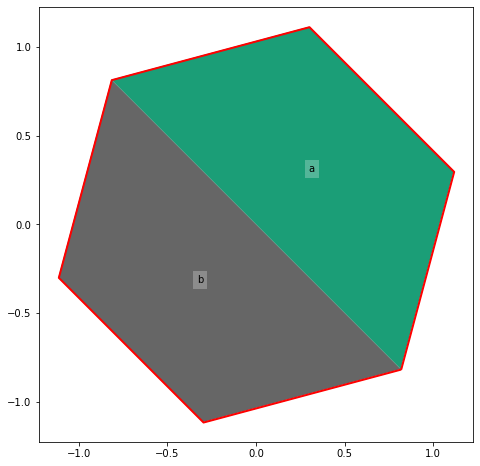

In [12]:
unit = WeaveUnit(strands = "ab|-", 
                       spacing = 1, aspect = 0.9, crs = data.crs).transform_rotate(30)
unit = TileUnit(tiling_type = "hex-dissection", n= 2, dissection_offset = 0,
                       spacing = 2, crs = data.crs).transform_rotate(15)
unit.plot(r = 0)

In [13]:
tiling = Tiling(unit, data)

In [14]:
t = tiling.get_tiled_map(debug = True)

STEP 1: prep data (rotation if requested): 0.004
STEP A2: overlay zones with tiling: 2.272
STEP A3: calculate areas: 0.011
STEP A4: drop columns prior to join: 0.004


/home/osullid3/Documents/code/weaving-space/weavingspace/tile_map.py:332: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  overlaps["area"] = overlaps.geometry.area


STEP A5: build lookup for join: 0.589
STEP A6: perform lookup join: 0.013


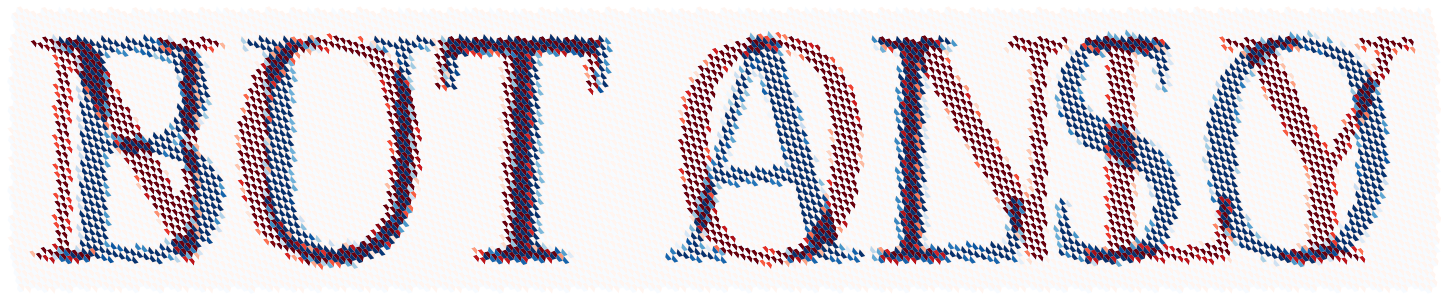

In [15]:
t.variables = dict(zip(list("ab"), ["notonly", "butalso"]))
t.colourmaps = dict(zip(t.variables.values(), 
                          ["Reds", "Blues"]), scheme = "equalinterval")

fig = t.render(legend = False, linewidth = 0)

In [16]:
t.to_file("other-data/dual-name-tiled-5.gpkg")